# Exploring Text

In this lesson, we'll be taking a look at a data set that contains SMS messages that are labelled as either a spam text message, or a valid, a.k text message.

In [167]:
import pandas as pd
df = pd.read_csv('spam.csv', 
                 encoding='latin-1',
                 usecols=[0,1]) # use first 2 columns only to get rid of unnamed columns full of nans
df.columns = ['label', 'text']
df.head()
# df.isnull().sum()

# df.info()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
labels = pd.concat([df.label.value_counts(), # get total counts of ham vs spam
                    df.label.value_counts(normalize=True)], axis=1) # getting the prop of ham vs. spam
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


________________________

Clean the text (see [data prep lesson](https://ds.codeup.com/nlp/prepare/#removing-accented-characters)) and create 3 sets of words: 

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [169]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd

def basic_clean(text):
    text = (unicodedata.normalize('NFKD', text.lower())
            .encode('ascii', 'ignore') # ascii to reduce noise
            .decode('utf-8', 'ignore') # decode using utf-8
           )
    return re.sub(r"[^a-z0-9\s]", '', text)

In [170]:
df['text_cleaned'] = df.text.apply(basic_clean)
df.head()

,label,text,text_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [171]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str=True)
    
    return string

In [172]:
df['text_tokenized'] = df.text_cleaned.apply(tokenize)
df.head()

,label,text,text_cleaned,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...


In [173]:
def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

In [174]:
df['text_lemmatized'] = df.text_tokenized.apply(lemmatize)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...


In [175]:
def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))
    
    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords


In [176]:
df['text_filtered'] = df.text_lemmatized.apply(remove_stopwords)
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though


Add a column with list of words

In [177]:
# (a|b)

words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.text_filtered]
# words 

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [178]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]"


**Exploring all the words together, Not by document**

- any common words that you're missing from the stopword list...noise that is still in your data. 
- common words that are spelled differently across the documents
- Are there words more common in spam than ham? vice versa?

**Exploring documents**

- exploring n-grams, phrases. bi-grams are 2-word phrases, tri-grams are 3-word phrases, 4-gram, ...

To finalize prep for exploration: 

1. add a feature that is the length of each document. 
2. build a set of ham_words and spam_words to epxlore. 

In [179]:
ham_words = ' '.join(df[df.label=='ham'].text_filtered)
spam_words = ' '.join(df[df.label=='spam'].text_filtered)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)

spam_words

'free entrywkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s freemsg hey darlingweek word back id like fun still tb ok xxx std chgs send a150 rcv winner valued network customer selected receivea a900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 monthr entitled update latest colour mobile camera free call mobile update co free 08002986030 six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hlinfo urgentweek free membership a100000 prize jackpot txt word claim 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl englandmacedonia dont miss goalsteam news txt ur national team 87077 eg england 87077 trywales scotland 4txti14120 poboxox36504w45wq 16 thanks subscription ringtone uk mobile charged a5month please confirm replying yes reply

Once we have a list of words, we can transform it into a pandas `Series`, which we can then use to show us how often each of the words occurs.

In [180]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()

spam_freq.head()

call    342
free    191
txt     140
text    129
ur      125
dtype: int64

Now we'll combine these three together to get one resulting data frame that we can work with:

In [181]:
word_counts = (pd.concat([ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts['all'] = word_counts['ham'] + word_counts['spam']
word_counts.head()

,ham,spam,all
008704050406,0,2,2
0089my,0,1,1
0121,0,1,1
01223585236,0,1,1
01223585334,0,2,2


Next, compute proportion of each string that is spam. Because only 13% of text messages in this sample are spam, we should expect about that amount for each term (given the sample size is large enough). If we see significantly higher or lower, then that word might be a good feature in predicting spam or ham. A chi-square test could confirm or deny significance if needed. 

In [182]:
word_counts['prop_spam'] = word_counts['spam']/word_counts['all']

In [183]:
word_counts.head(10)

,ham,spam,all,prop_spam
008704050406,0,2,2,1.0
0089my,0,1,1,1.0
0121,0,1,1,1.0
01223585236,0,1,1,1.0
01223585334,0,2,2,1.0
0125698789,1,0,1,0.0
02,0,1,1,1.0
020603,0,4,4,1.0
0207,0,2,2,1.0
02070836089,0,1,1,1.0


Note for later: We may want to see what the counts look like if we group together all strings with numbers in them. 

For now, though, we will filter out rows with strings that only occur less a certain amount, as they are likely not going to provide much information. 
Let's first look at the distribution of counts to decide where that cutoff will be. 

In [184]:
print("The number of words that occur n times: ")
word_counts['all'].value_counts().head(20)

The number of words that occur n times: 


1     6404
2     1473
3      641
4      362
5      217
6      173
7      145
8       97
9       94
10      69
12      54
11      50
13      45
14      34
17      30
15      30
19      25
18      21
20      21
23      20
Name: all, dtype: int64

I will filter out all words that occur less than 15 times. 

In [192]:
word_counts = word_counts[word_counts['all'] >= 15]
word_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 08000839402 to yup
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ham        545 non-null    int64  
 1   spam       545 non-null    int64  
 2   all        545 non-null    int64  
 3   prop_spam  545 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 21.3+ KB


This leaves us with 545 words, still a lot, but much more managable and less noisy. 

We can now use this data set to answer some interesting questions:

- Are there words that should be added to the stopword list? 
- Are there words that are significantly more likely to occur in spam than in ham? 

**Spam heavy words**

In [193]:
word_counts[word_counts.prop_spam == 1.0].sort_values(by='spam', ascending=False)

,ham,spam,all,prop_spam
claim,0,96,96,1.0
prize,0,82,82,1.0
tone,0,60,60,1.0
guaranteed,0,50,50,1.0
18,0,41,41,1.0
awarded,0,38,38,1.0
a1000,0,33,33,1.0
150ppm,0,32,32,1.0
a2000,0,28,28,1.0
ringtone,0,26,26,1.0


**Takeaways**

If numbers are rare in ham text, then I will definitely create a feature of 'has_numeric_string' (boolean). 

In addition, the following are all good candidates for features: 

- bonus, valid, delivery, dating, unsubscribe, unredeemed, claim, prize, tone, guaranteed, awarded, awarded, ringtone, collection, expires 

**Ham heavy words**

In [199]:
word_counts[(word_counts.prop_spam == .00) & (word_counts.ham > 45)].sort_values(by='ham', ascending=False)

,ham,spam,all,prop_spam
ltgt,248,0,248,0.0
lor,129,0,129,0.0
da,121,0,121,0.0
later,118,0,118,0.0
say,107,0,107,0.0
way,95,0,95,0.0
thats,88,0,88,0.0
morning,78,0,78,0.0
yeah,78,0,78,0.0
didnt,76,0,76,0.0


**Takeaways**

Many good candidates for features here. The "personality" of these terms vs the spam words is very different. These are much more personal and conversational, such as 'yeah', 'lol', 'haha', 'nice', 'feel', 'say', 'morning', ...

### Document Word Count

The length of documents is often a good feature. 

In [55]:
len(df.words[0])

12

In [56]:
df['doc_length'] = [len(wordlist) for wordlist in df.words]

In [57]:
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",21
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]",8


In [59]:
df = df[df.doc_length!=0]

## Visualize

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs. Ham for the 20 most common words in our text sample')

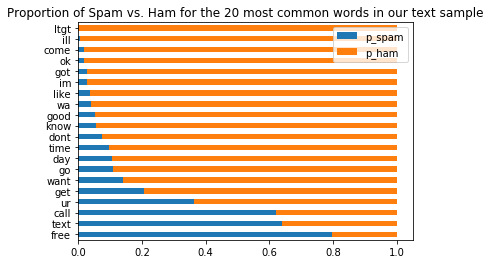

In [202]:
# visualize the percentage of the term in ham vs. spam

(word_counts.assign(p_spam = word_counts.spam/word_counts['all'], 
                   p_ham = word_counts.ham/word_counts['all'])
 .sort_values(by='all')[['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True)
)

plt.title("Proportion of Spam vs. Ham for the 20 most common words in our text sample")

### Word Clouds

```
python -m pip install --upgrade wordcloud
```

The wordcloud allows you to identify the relative frequency of different keywords using an easily digestible visual.

#### Common Use Cases

As a visualization technique, this method gives a more qualitative analysis of the topics in the documents.
 
#### Pros

1. It’s intuitive and easy to comprehend.
2. It helps identify overall respondent sentiment and the specific factors that drive it.
3. It provides direction for further analysis.

#### Cons

1. It fails to measure each word’s value in and of itself.
2. It allows irrelevant words to appear.
3. When words appear similar in size, it becomes difficult to differentiate them.

First we'll take a look at a simple example:

(-0.5, 399.5, 199.5, -0.5)

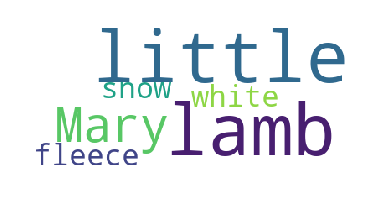

In [203]:
from wordcloud import WordCloud

sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow.'

img = WordCloud(background_color='white').generate(sentence)
plt.imshow(img)

plt.axis('off')

In [204]:
ham_words

'go jurong point crazy available bugisgreat world labuffet cine got amore wat ok lar joking wifonidun say early horc already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam ha set callertune caller presscopy friend callertune im gonna home soon dont want talk stuff anymore tonightive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching ehrememberspell name yesnaughty makewet fine thataos wayfeel thataos way gotaseriously spell name ium going trymonth ha ha joking pay first lar da stock comin aft finish lunch go str lor ardsmth lorfinish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love im back amp packing ca

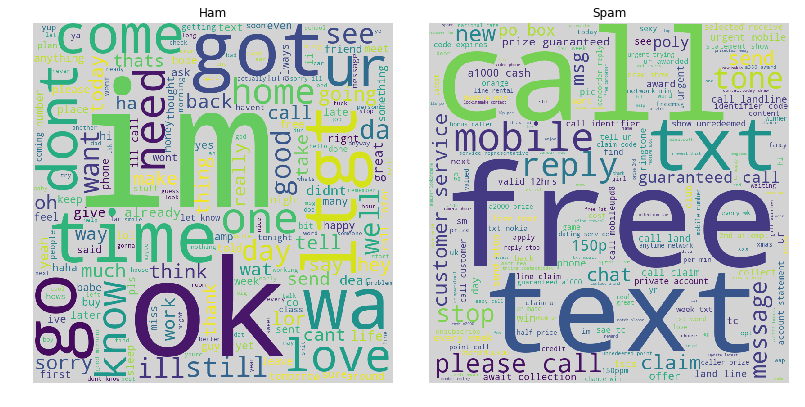

In [205]:
ham_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(spam_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

## Bigrams

Bigrams are a specific instance of the broader concept of n-grams, which is a way to combine words together. This lets us measure not just the individual word frequency, but also takes into account which words appear together.

To produce the bigrams, we'll use `nltk`.

In [206]:
sentence
bigrams = nltk.ngrams(sentence.split(), 2) # n = 2
list(bigrams)

[('Mary', 'had'),
 ('had', 'a'),
 ('a', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb,'),
 ('lamb,', 'little'),
 ('little', 'lamb.'),
 ('lamb.', 'Its'),
 ('Its', 'fleece'),
 ('fleece', 'was'),
 ('was', 'white'),
 ('white', 'as'),
 ('as', 'snow.')]

We can apply the same transformation to our ham data set in order to find out which bigrams are the most frequently occuring.

In [207]:
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]
df.head()

,label,text,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,bigrams
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...","[(go, jurong), (jurong, point), (point, crazy)..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]","[(ok, lar), (lar, joking), (joking, wifoni)]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...","[(free, entrywkly), (entrywkly, comp), (comp, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]","[(u, dun), (dun, say), (say, early), (early, h..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...,nah i dont think he go to usf he life around h...,nah dont think go usf life around though,"[nah, dont, think, go, usf, life, around, though]","[(nah, dont), (dont, think), (think, go), (go,..."


In [90]:
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts().head(20)
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts().head(20)
spam_bigrams

(please, call)          43
(customer, service)     27
(guaranteed, call)      23
(po, box)               23
(prize, guaranteed)     22
(a1000, cash)           20
(send, stop)            19
(every, week)           19
(await, collection)     18
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(account, statement)    16
(claim, call)           16
(sae, tc)               16
(identifier, code)      15
(call, 08000930705)     15
(reply, call)           15
(selected, receive)     15
(call, mobileupd8)      15
dtype: int64

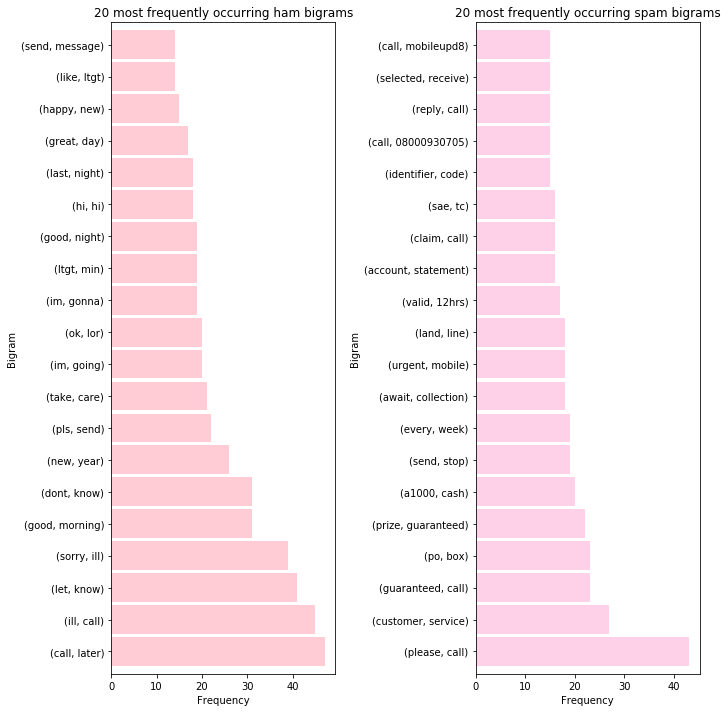

In [102]:
plt.subplot(121)
ham_bigrams.plot.barh(color='pink', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

We can use these bigrams to make a word cloud as well, with a little more effort.

In [103]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.

data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
data

{'please call': 43,
 'customer service': 27,
 'guaranteed call': 23,
 'po box': 23,
 'prize guaranteed': 22,
 'a1000 cash': 20,
 'send stop': 19,
 'every week': 19,
 'await collection': 18,
 'urgent mobile': 18,
 'land line': 18,
 'valid 12hrs': 17,
 'account statement': 16,
 'claim call': 16,
 'sae tc': 16,
 'identifier code': 15,
 'call 08000930705': 15,
 'reply call': 15,
 'selected receive': 15,
 'call mobileupd8': 15}

(-0.5, 799.5, 399.5, -0.5)

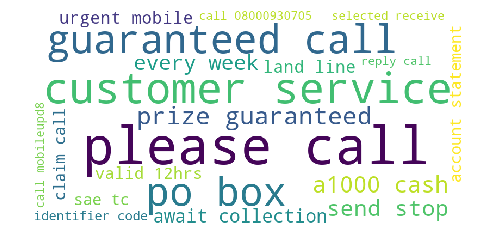

In [104]:
img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

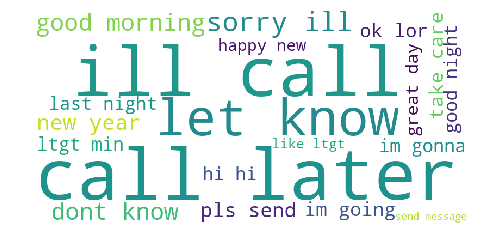

In [106]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
# data

img = WordCloud(background_color='white', 
                width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')

## Exercises

Do your work for this exercise in a file named `explore`.

1. Spam Data

    1. Load the spam data set.
    1. Create and explore bigrams for the spam data. Visualize them with a word
       cloud. How do they compare with the ham bigrams?
    1. Is there any overlap in the bigrams for the spam data and the ham data?
    1. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both
       the spam and ham data.
    1. bonus: plot document length information of spam vs. ham. Does there appear to be a difference? 

1. Explore the blog articles using the techniques discussed in the exploration
   lesson.

1. Explore the news articles using the techniques discussed in the exploration
   lesson. Use the `category` variable when exploring.
